##Predicting Patient Appointment Attendance Using Machine Learning

#Project Aim

**Aim**:

The primary aim of this project is to develop a predictive model that can accurately forecast the status of patient appointments (e.g., whether a patient will attend, miss, or cancel their appointment) based on various factors such as age, gender, appointment purpose, provider, service type, and the number of previous visits. This model will help healthcare providers optimize their scheduling, improve resource allocation, and reduce the number of missed appointments, thereby enhancing overall efficiency and patient care.

#Why Do We Need This Project?

1. Improve Appointment Management: Missed or canceled appointments can lead to inefficiencies in the healthcare system, such as wasted resources and unutilized time slots. By predicting appointment statuses, healthcare providers can better manage their schedules, ensuring that time slots are effectively utilized.

2. Enhance Patient Care: By understanding the factors that contribute to missed or canceled appointments, healthcare providers can proactively engage with patients who are at higher risk of not showing up. This can lead to improved patient engagement and better health outcomes.

3. Resource Optimization: Accurate predictions of appointment statuses allow healthcare facilities to optimize their resource allocation, including staff, equipment, and time. This ensures that resources are used efficiently, reducing costs and improving service delivery.

4. Increase Revenue: Reducing the number of missed appointments can lead to increased revenue for healthcare providers. Missed appointments often mean lost revenue opportunities, so by minimizing these occurrences, providers can improve their financial performance.

5. Data-Driven Decision Making: The project emphasizes the importance of leveraging data to make informed decisions. By using historical data and machine learning techniques, healthcare providers can gain insights into patient behavior and appointment trends, leading to more effective decision-making processes.

Overall Impact
This project addresses a critical need in the healthcare industry by providing a solution that enhances operational efficiency, improves patient care, and increases revenue through better appointment management.


#Data Description
The dataset contains the following columns:


*   Date Of Service: The date when the service was provided.

* Visit Type: Type of visit (e.g., Specialist 1st visit, GP Visit).

* Patient File No.: Unique identifier for the patient.

* Date Of Birth: Birthdate of the patient.

* Age: Age of the patient at the time of the visit.

* Status: Patient's status (e.g., Child, Adult).

* Gender: Gender of the patient.

* Appointment Purpose: Reason for the appointment.

* Appointment Status: Status of the appointment (e.g., Seen, Waiting).

* Provider: The healthcare provider for the visit.

* Service: The type of service provided.

* Scheme: Healthcare scheme used.

* Visit Fee: Total fee for the visit.

* Consultation: Fee for consultation.

* OP Procedures: Charges for outpatient procedures.

* OP Packages: Charges for outpatient packages.

* Lab Tests: Charges for lab tests.

* Medication: Charges for medication.

* Ultrasound: Charges for ultrasound.

* X-Ray: Charges for X-Ray.

* Dental Revenue: Charges for dental services.

* Total: Total charges for the visit.

* Number of Visits: Total number of visits by the patient.

* Patient Share: Portion of the visit fee paid by the patient.

* Corporate Share: Portion of the visit fee covered by the corporation.

* Refund Amount: Amount refunded.

* Final Amount: Final amount billed.

##2. Data Preprocessing

Importing libraries necessary for our project

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib

###Load Data
First, the dataset is loaded into a Pandas DataFrame. This allows us to perform various operations on the data, such as cleaning, transformation, and analysis.


In [ ]:
# Load the dataset
df = pd.read_csv('/content/AAR HEALTHCARE_FINAL - Data.csv')

<ipython-input-2-6a94af9e178c>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/AAR HEALTHCARE_FINAL - Data.csv')


#Data Exploration

We examine the dimensions of our dataset.

In [ ]:
# Display the first few rows of the dataset
df.head()

,Date Of Service,Visit Type,Patient File No.,Date Of Birth.,Age,Status,Gender.,Appointment Purpose,Appointment Status,Provider,...,Medication,Ultrasound,X-Ray,Dental Revenue,Total,Number of Visits,Patient Share,Corporate Share,Refund Amount.,Final Amount
0,2/28/2017,Dentist Capitated Visit,PAMR19513,1/1/2017,0,Child,Male,New Patient,Waiting,Provider 11,...,0,0,0,0,"1,100.00",NaN,0,"1,100.00",0,"1,100.00"
1,6/8/2017,Specialist 1st visit,PAMR10424,2/1/2017,0,Child,Male,New Patient,Seen,Provider 20,...,864.8,0,0,0,"2,814.80",NaN,0,"2,814.80",0,"2,814.80"
2,6/22/2018,Specialist 1st visit,PAMR15905,2/1/2018,0,Child,Male,New Patient,Waiting,Provider 3,...,0,0,0,0,"1,950.00",NaN,0,"1,950.00",0,"1,950.00"
3,6/22/2018,Specialist 1st visit,PAMR15905,2/1/2018,0,Child,Male,New Patient,Waiting,Provider 3,...,0,0,0,0,"1,950.00",NaN,0,"1,950.00",0,"1,950.00"
4,2/14/2018,GP Visit,PAMR0230,1/11/2018,0,Child,Female,New Patient,Seen,Provider 2,...,"1,120.00",0,0,0,"2,320.00",NaN,0,"2,320.00",0,"2,320.00"


In [ ]:
# Display the last few rows of the dataset
df.tail()

,Date Of Service,Visit Type,Patient File No.,Date Of Birth.,Age,Status,Gender.,Appointment Purpose,Appointment Status,Provider,...,Medication,Ultrasound,X-Ray,Dental Revenue,Total,Number of Visits,Patient Share,Corporate Share,Refund Amount.,Final Amount
72995,1/3/2018,Physiotherapy - Visit,PAMR16690,1/16/2009,8,Child,Male,New Patient,Waiting,Provider 7,...,0,0,0,0,"2,500.00",NaN,0,"2,500.00",0,"2,500.00"
72996,1/13/2018,Physiotherapy - Visit,PAMR16690,1/16/2009,8,Child,Male,New Patient,Waiting,Provider 7,...,0,0,0,0,"2,500.00",NaN,0,"2,500.00",0,"2,500.00"
72997,2/14/2018,Physiotherapy - Visit,PAMR16690,1/16/2009,9,Child,Male,New Patient,Waiting,Provider 7,...,0,0,0,0,"2,500.00",NaN,0,"2,500.00",0,"2,500.00"
72998,1/17/2018,Radiology Visit,PAMR5615,2/27/2009,8,Child,Male,New Patient,Waiting,Provider 20,...,0,0,"1,500.00",0,"1,500.00",NaN,0,"1,500.00",0,"1,500.00"
72999,1/2/2018,GP Visit,PAMR18349,6/6/1990,27,Adult,Male,New Patient,Seen,Provider 9,...,"2,668.80",0,0,0,"3,868.80",NaN,0,"3,868.80",0,"3,868.80"


In [ ]:
# Display the shape of the dataset
df.shape

(73000, 27)

In [ ]:
# Inspecting Data Columns
df.columns

Index(['Date Of Service', 'Visit Type', 'Patient File No.', 'Date Of Birth.',
       'Age', 'Status', 'Gender.', 'Appointment Purpose', 'Appointment Status',
       'Provider', 'Service', 'Scheme', 'Visit Fee', 'Consultation',
       'OP Procedures', 'OP Packages', 'Lab Tests', 'Medication', 'Ultrasound',
       'X-Ray', 'Dental Revenue', 'Total', 'Number of Visits', 'Patient Share',
       'Corporate Share', 'Refund Amount.', 'Final Amount'],
      dtype='object')

In [ ]:
# Display data types of each column
df.dtypes

,0
Date Of Service,object
Visit Type,object
Patient File No.,object
Date Of Birth.,object
Age,int64
Status,object
Gender.,object
Appointment Purpose,object
Appointment Status,object
Provider,object


In [ ]:
# Display summary statistics
df.describe()

,Age,Number of Visits
count,73000.000000,0.0
mean,29.816630,NaN
std,19.750263,NaN
min,0.000000,NaN
25%,11.000000,NaN
50%,31.000000,NaN
75%,42.000000,NaN
max,87.000000,NaN


#Data Cleaning

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Date Of Service,0
Visit Type,0
Patient File No.,0
Date Of Birth.,0
Age,0
Status,0
Gender.,0
Appointment Purpose,0
Appointment Status,0
Provider,0


In [ ]:
# Renaming Columns for Consistency
df.rename(columns={"Gender.": "Gender", "Date Of Birth.": "Date Of Birth", "Patient File No.": "Patient File", "Refund Amount.": "Refund Amount"}, inplace=True)

In [ ]:
# Calculate the number of visits for each patient
number_of_visits = df.groupby('Patient File')['Date Of Service'].count().reset_index(name='Number of Visits')

# Merge the calculated number of visits back into the original DataFrame
df = df.merge(number_of_visits, on='Patient File', how='left', suffixes=('', '_new'))
# Update the existing 'Number of Visits' column with the new values
df['Number of Visits'] = df['Number of Visits_new']
df.drop('Number of Visits_new', axis=1, inplace=True)

In [ ]:
# Drop duplicates
df = df.drop_duplicates()

#Exploratory Data Analysis (EDA)

Explore and visualize the data to uncover patterns and insights.

<ipython-input-13-3f120f896f35>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'].dropna(), shade=True)


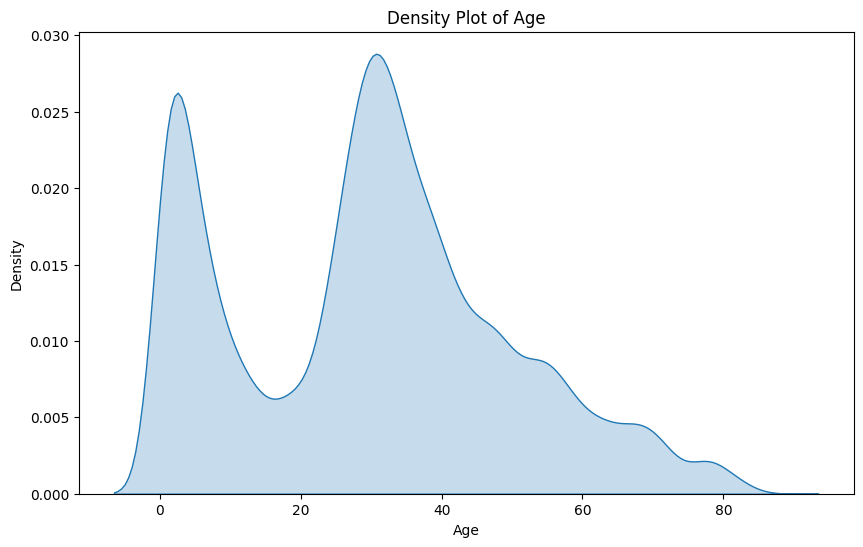

In [ ]:
# Plotting a density plot of the 'Age' column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'].dropna(), shade=True)
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [ ]:
df.columns

Index(['Date Of Service', 'Visit Type', 'Patient File', 'Date Of Birth', 'Age',
       'Status', 'Gender', 'Appointment Purpose', 'Appointment Status',
       'Provider', 'Service', 'Scheme', 'Visit Fee', 'Consultation',
       'OP Procedures', 'OP Packages', 'Lab Tests', 'Medication', 'Ultrasound',
       'X-Ray', 'Dental Revenue', 'Total', 'Number of Visits', 'Patient Share',
       'Corporate Share', 'Refund Amount', 'Final Amount'],
      dtype='object')

In [ ]:
# Convert 'Date Of Service' and 'Date Of Birth' to datetime
df['Date Of Service'] = pd.to_datetime(df['Date Of Service'], errors='coerce')
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'], errors='coerce')

# Convert relevant columns to numeric
df['Patient Share'] = pd.to_numeric(df['Patient Share'], errors='coerce')
df['Corporate Share'] = pd.to_numeric(df['Corporate Share'], errors='coerce')

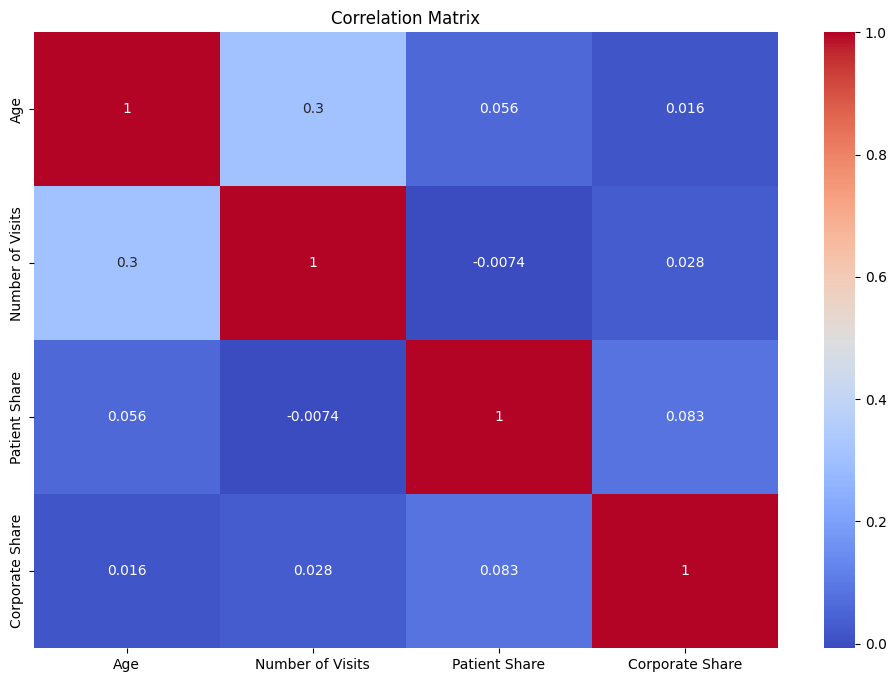

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Data Visualization

Creating plots to understand relationships between different features.

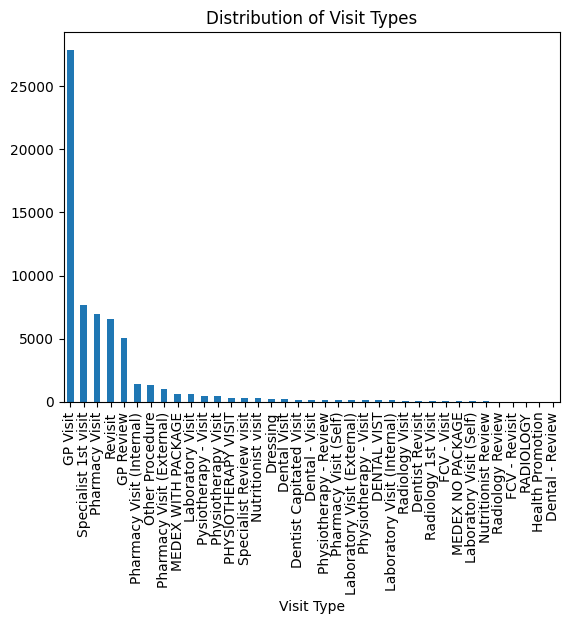

In [ ]:
#Distribution of Visit Types
import matplotlib.pyplot as plt
df['Visit Type'].value_counts().plot(kind='bar', title='Distribution of Visit Types')
plt.show()

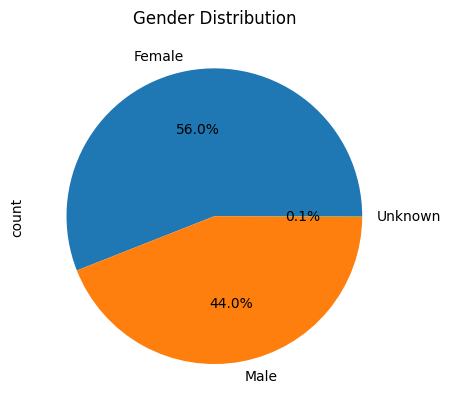

In [ ]:
#Gender Distribution
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Gender Distribution')
plt.show()

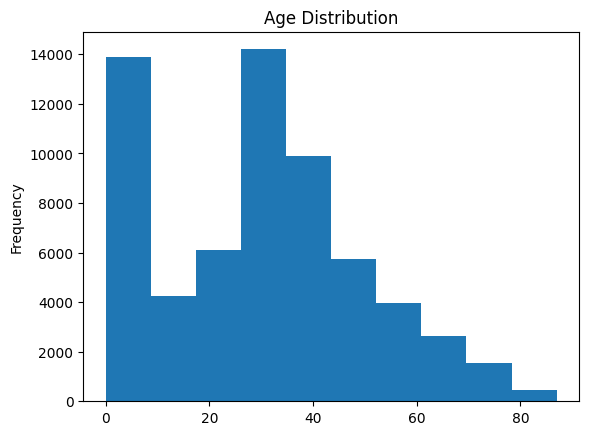

In [ ]:
# Age Distribution
df['Age'].plot(kind='hist', bins=10, title='Age Distribution')
plt.show()

In [ ]:
df['Total'] = pd.to_numeric(df['Total'], errors='coerce')

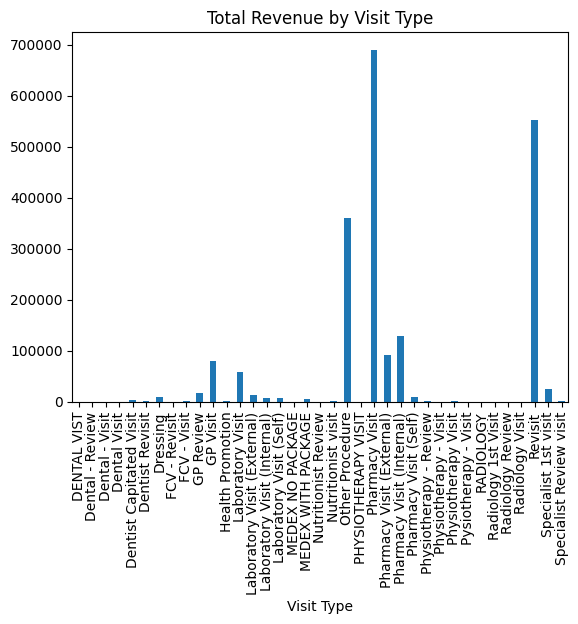

In [ ]:
#Total Revenue by Visit Type
revenue_by_visit_type = df.groupby('Visit Type')['Total'].sum()
revenue_by_visit_type.plot(kind='bar', title='Total Revenue by Visit Type')
plt.show()


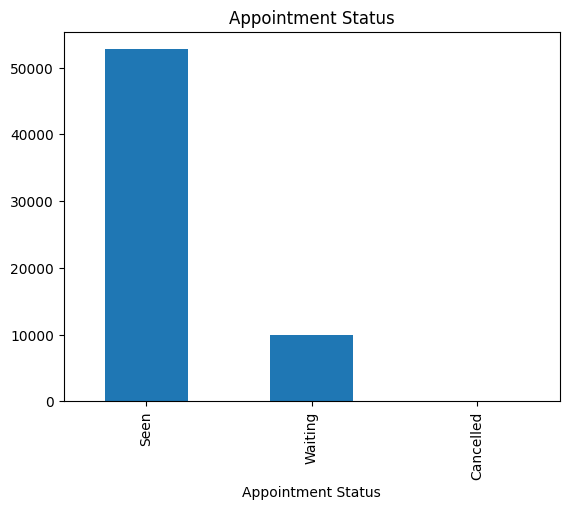

In [ ]:
#Appointment Status
df['Appointment Status'].value_counts().plot(kind='bar', title='Appointment Status')
plt.show()

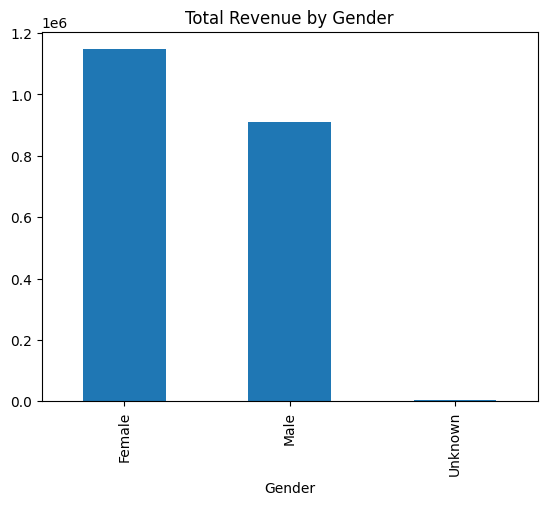

In [ ]:
#Revenue Breakdown by Gender
revenue_by_gender = df.groupby('Gender')['Total'].sum()
revenue_by_gender.plot(kind='bar', title='Total Revenue by Gender')
plt.show()

In [ ]:
df['Patient Share'] = pd.to_numeric(df['Patient Share'], errors='coerce')
df['Corporate Share'] = pd.to_numeric(df['Corporate Share'], errors='coerce')


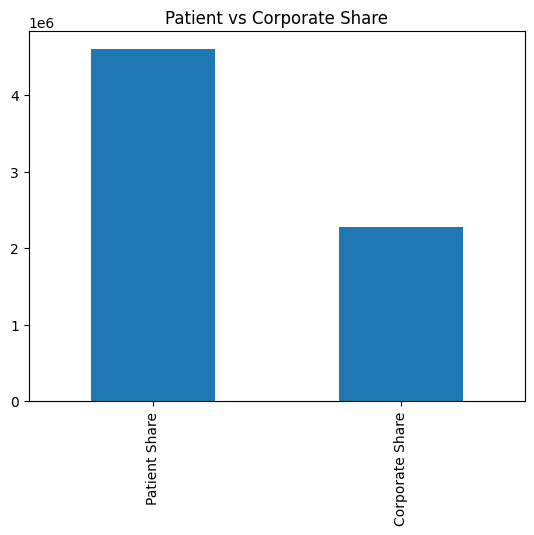

In [ ]:
#Patient Share vs. Corporate Share
df[['Patient Share', 'Corporate Share']].sum().plot(kind='bar', title='Patient vs Corporate Share')
plt.show()

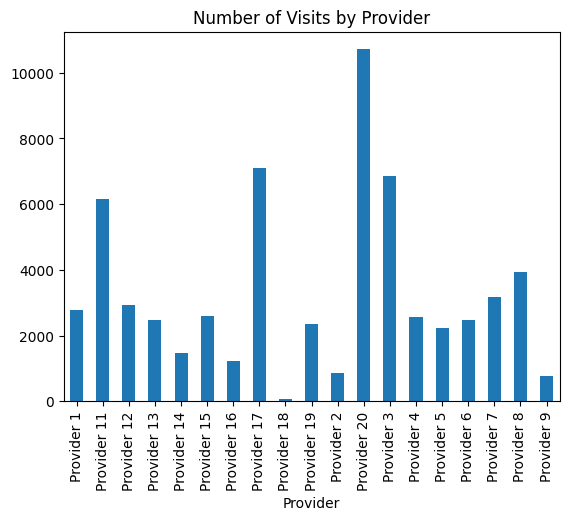

In [ ]:
#Service Provider Analysis
df.groupby('Provider').size().plot(kind='bar', title='Number of Visits by Provider')
plt.show()


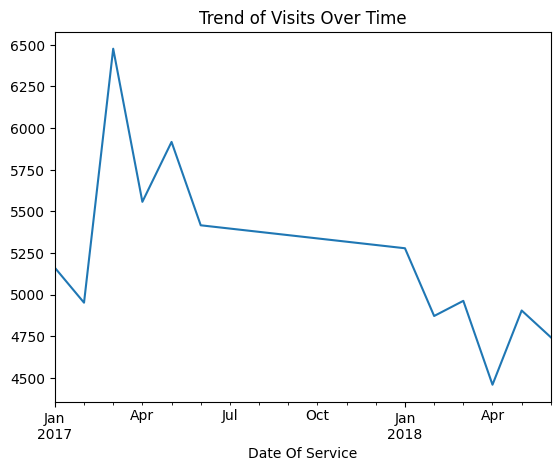

In [ ]:
#Trend of Visits Over Time
df['Date Of Service'] = pd.to_datetime(df['Date Of Service'])
visits_over_time = df.groupby(df['Date Of Service'].dt.to_period('M')).size()
visits_over_time.plot(kind='line', title='Trend of Visits Over Time')
plt.show()


#Model Building and Evaluation
###Initialize and Train the Model
A Random Forest Classifier is used for this task. It’s a robust model that works well with a mix of numerical and categorical data.

In [ ]:
# Create new feature: Age Group
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 40, 60, np.inf], labels=['Child', 'Adult', 'Middle-aged', 'Senior'])


Define Features and Target Variable

Features (X) are the independent variables used to predict the target variable (y), which in this case is the appointment status.

In [ ]:
# Define features and target variable
X = df[['Age', 'Gender', 'Appointment Purpose', 'Provider', 'Service', 'Scheme', 'Number of Visits', 'Age Group']]
y = df['Appointment Status']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating a Machine Learning Pipeline with Preprocessing and Classification

In [ ]:
# Define preprocessing for numeric features
numeric_features = ['Age', 'Number of Visits']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_features = ['Gender', 'Appointment Purpose', 'Provider', 'Service', 'Scheme', 'Age Group']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the pipeline with the RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

In [ ]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Number of Visits']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender',
                                                   'Appointment Purpose',
                                                   'Provider', 'Service',
                                                   'Scheme', 'Age Group'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

   Cancelled       0.00      0.00      0.00        15
        Seen       0.90      0.94      0.92     15798
     Waiting       0.60      0.47      0.53      2996

    accuracy                           0.87     18809
   macro avg       0.50      0.47      0.48     18809
weighted avg       0.85      0.87      0.86     18809

Confusion Matrix:
 [[    0    14     1]
 [    6 14875   917]
 [    1  1591  1404]]


In [ ]:
# Save the trained model to a file
joblib.dump(pipeline, 'appointment_status_predictor.pkl')

# Load the model from the file (for deployment)
loaded_model = joblib.load('appointment_status_predictor.pkl')

In [ ]:
# Example of making a prediction with the loaded model
sample_data = pd.DataFrame({
    'Age': [45],
    'Gender': ['Male'],
    'Appointment Purpose': ['Consultation'],
    'Provider': ['Dr. Smith'],
    'Service': ['General'],
    'Scheme': ['Insurance A'],
    'Number of Visits': [5],
    'Age Group': ['Middle-aged']
})
prediction = loaded_model.predict(sample_data)
print(f"Predicted Appointment Status: {prediction[0]}")

Predicted Appointment Status: Seen
